In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np 

import matplotlib 
import matplotlib.pyplot as plt 

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_excel(r"C:\Users\Ella Schlaghecke\OneDrive\Desktop\Hakko\data.projects\StudentPerformanceFactors.xlsx")
df

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                            No            7               73   
1                            No            8               59   
2                           Yes            7               91   
3                           Yes            8               98   
4                           Yes            6               65   
...                         ...          ...              ...   
6602                         No            7               76   
6603                         No            8               81   
6604                        Yes            6               65   
6605                        Yes            6               91   
6606                        Yes            9               94   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
0                 Low             Yes                  0           Low   
1                 Low             Yes                  2        Medium   
2              Medium             Yes                  2        Medium   
3              Medium             Yes                  1        Medium   
4              Medium             Yes                  3        Medium   
...               ...             ...                ...           ...   
6602           Medium             Yes                  1          High   
6603           Medium             Yes                  3           Low   
6604              Low             Yes                  3           Low   
6605             High             Yes                  2           Low   
6606           Medium             Yes                  0        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
0             Medium      Public       Positive                  3   
1             Medium      Public       Negative                  4   
2             Medium      Public        Neutral                  4   
3             Medium      Public       Negative                  4   
4               High      Public        Neutral                  4   
...              ...         ...            ...                ...   
6602          Medium      Public       Positive                  2   
6603            High      Public       Positive                  2   
6604          Medium      Public       Negative                  2   
6605          Medium     Private       Positive                  3   
6606          Medium      Public       Positive                  4   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
0                       No              High School               Near   
1                       No                  College           Moderate   
2                       No             Postgraduate               Near   
3                       No              High School           Moderate   
4                       No                  College               Near   
...                    ...                      ...                ...   
6602                    No              High School             

In [3]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Hours_Studied - 0.0%
Attendance - 0.0%
Parental_Involvement - 0.0%
Access_to_Resources - 0.0%
Extracurricular_Activities - 0.0%
Sleep_Hours - 0.0%
Previous_Scores - 0.0%
Motivation_Level - 0.0%
Internet_Access - 0.0%
Tutoring_Sessions - 0.0%
Family_Income - 0.0%
Teacher_Quality - 0.011805660662933253%
School_Type - 0.0%
Peer_Influence - 0.0%
Physical_Activity - 0.0%
Learning_Disabilities - 0.0%
Parental_Education_Level - 0.013621916149538369%
Distance_from_Home - 0.010140759800211896%
Gender - 0.0%
Exam_Score - 0.0%


In [4]:
# Data tyoe of each factor

df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [5]:
# Sorting by hours studied in descending order

df=df.sort_values(by=['Hours_Studied'], inplace=False, ascending=False)

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
df = df.dropna()
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [8]:
df.describe().T

count       mean        std   min   25%   50%   75%    max
Hours_Studied      6378.0  19.977109   5.985460   1.0  16.0  20.0  24.0   44.0
Attendance         6378.0  80.020853  11.550723  60.0  70.0  80.0  90.0  100.0
Sleep_Hours        6378.0   7.034964   1.468033   4.0   6.0   7.0   8.0   10.0
Previous_Scores    6378.0  75.066165  14.400389  50.0  63.0  75.0  88.0  100.0
Tutoring_Sessions  6378.0   1.495296   1.233984   0.0   1.0   1.0   2.0    8.0
Physical_Activity  6378.0   2.972719   1.028926   0.0   2.0   3.0   4.0    6.0
Exam_Score         6378.0  67.252117   3.914217  55.0  65.0  67.0  69.0  101.0

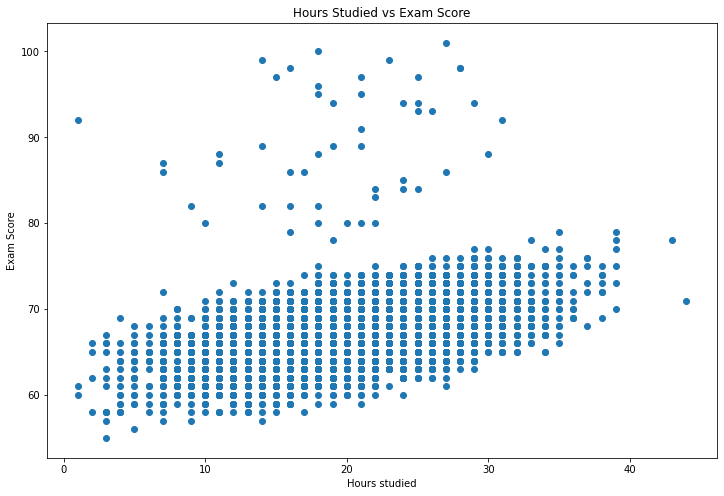

In [9]:
# Scatter plot hours studied vs exam score

plt.scatter(x=df['Hours_Studied'], y=df['Exam_Score'])

plt.title('Hours Studied vs Exam Score')

plt.xlabel('Hours studied')
plt.ylabel('Exam Score')

plt.show()

<AxesSubplot:xlabel='Hours_Studied', ylabel='Exam_Score'>

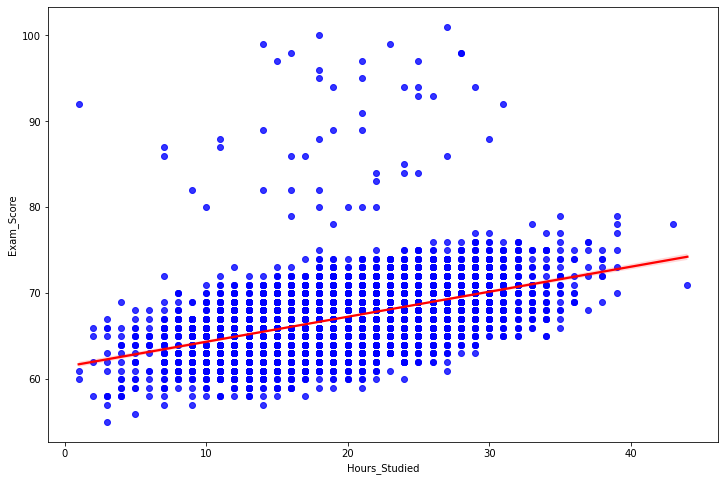

In [10]:
# Plot hours studied vs exam score using seaborn

sns.regplot(x='Hours_Studied', y='Exam_Score', data=df, scatter_kws={"color":"blue"}, line_kws={"color": "red"})

In [11]:
# Correlation

df.corr(method='pearson')

Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
Hours_Studied           1.000000   -0.004997     0.013119         0.022492   
Attendance             -0.004997    1.000000    -0.019602        -0.018083   
Sleep_Hours             0.013119   -0.019602     1.000000        -0.023238   
Previous_Scores         0.022492   -0.018083    -0.023238         1.000000   
Tutoring_Sessions      -0.009654    0.012070    -0.011466        -0.013158   
Physical_Activity       0.003183   -0.022976    -0.002898        -0.006694   
Exam_Score              0.445104    0.580259    -0.017171         0.174283   

                   Tutoring_Sessions  Physical_Activity  Exam_Score  
Hours_Studied              -0.009654           0.003183    0.445104  
Attendance                  0.012070          -0.022976    0.580259  
Sleep_Hours                -0.011466          -0.002898   -0.017171  
Previous_Scores            -0.013158          -0.006694    0.174283  
Tutoring_Sessions           1.000000           0.016325    0.156829  
Physical_Activity           0.016325           1.000000    0.025148  
Exam_Score                  0.156829           0.025148    1.000000

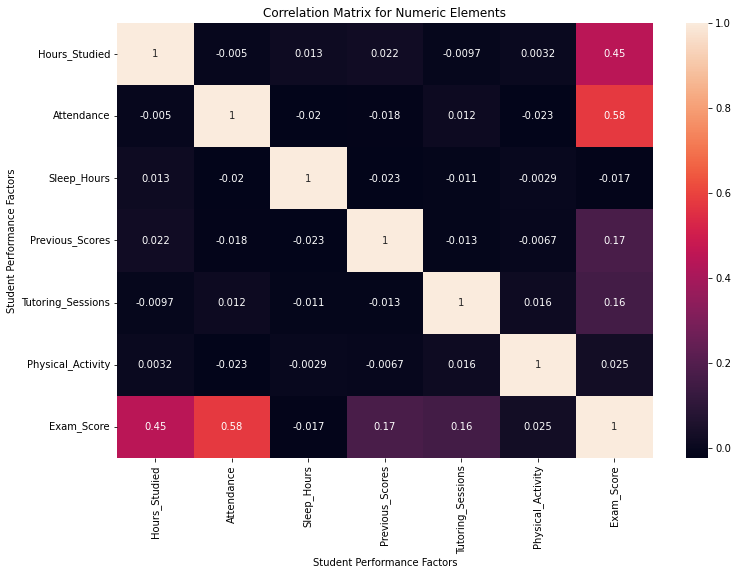

In [12]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Elements')

plt.xlabel('Student Performance Factors')
plt.ylabel('Student Performance Factors')


plt.show()

In [13]:
df.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
2895             44          68                 High                 Low   
209              43          86                 High              Medium   
1615             39          95               Medium                High   
2305             39          92               Medium              Medium   
3982             39          75               Medium                High   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
2895                         No            9               75   
209                         Yes            7               97   
1615                        Yes            9               54   
2305                         No            9               73   
3982                        Yes            6               82   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
2895              Low             Yes                  3        Medium   
209            Medium             Yes                  2        Medium   
1615             High             Yes                  2        Medium   
2305           Medium             Yes                  1        Medium   
3982             High             Yes                  1          High   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
2895            High     Private       Negative                  2   
209             High      Public       Positive                  1   
1615          Medium     Private       Positive                  3   
2305          Medium      Public       Negative                  4   
3982             Low      Public       Negative                  3   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
2895                    No              High School           Moderate   
209                     No              High School               Near   
1615                    No              High School           Moderate   
2305                    No             Postgraduate           Moderate   
3982                    No                  College               Near   

      Gender  Exam_Score  
2895  Female          71  
209   Female          78  
1615    Male          77  
2305    Male          75  
3982    Male          73

In [14]:
df_numericize = df.copy()

for col_name in df_numericize.columns: 
    if(df_numericize[col_name].dtype == 'object'):
        df_numericize[col_name] = df_numericize[col_name].astype('category')
        df_numericize[col_name] = df_numericize[col_name].cat.codes
        
df_numericize       
    

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
2895             44          68                     0                    1   
209              43          86                     0                    2   
1615             39          95                     2                    0   
2305             39          92                     2                    2   
3982             39          75                     2                    0   
1957             39          97                     0                    0   
5796             39          78                     2                    2   
3716             39          90                     0                    0   
2521             38          86                     0                    2   
5224             38          80                     0                    2   
4870             38          90                     0                    2   
5846             38          98                     1                    2   
5157             38          82                     2                    1   
2506             38          63                     2                    0   
478              38          86                     1                    0   
2035             37          94                     0                    2   
4784             37          69                     2                    0   
6350             37          96                     2                    2   
3241             37          96                     0                    2   
5673             37          79                     2                    0   
4047             37          73                     2                    0   
755              36          76                     2                    2   
2801             36          66                     1                    0   
6058             36          82                     1                    1   
1453             36          88                     2                    0   
1649             36          64                     2                    2   
2574             36          96                     2                    1   
179              36          71                     2                    2   
6252             36          90                     2                    0   
5808             36          89                     0                    1   
1934             36          68                     2                    2   
1491             35          83                     2                    1   
762              35          65                     0                    2   
3686             35          68                     1                    0   
880              35          72                     0                    0   
5670             35          91                     1                    2   
113              35          99                     0                    0   
5111             35          86                     1                    2   
847              35          64                     2                    2   
1233             35          90                     0                    2   
614              35          85                     2                    0   
6022             35          84                     2                    2   
4851             35          64                     2                    1   
5535             35          67                     0                    0   
1165             35          93                     2                    2   
2544             35          77                     0                    0   
1291             35          61                     2                    0   
6485             35          84                     1                    2   
654              35          78                     0                    1   
3553             35          94                     0                    2   
5376             35         

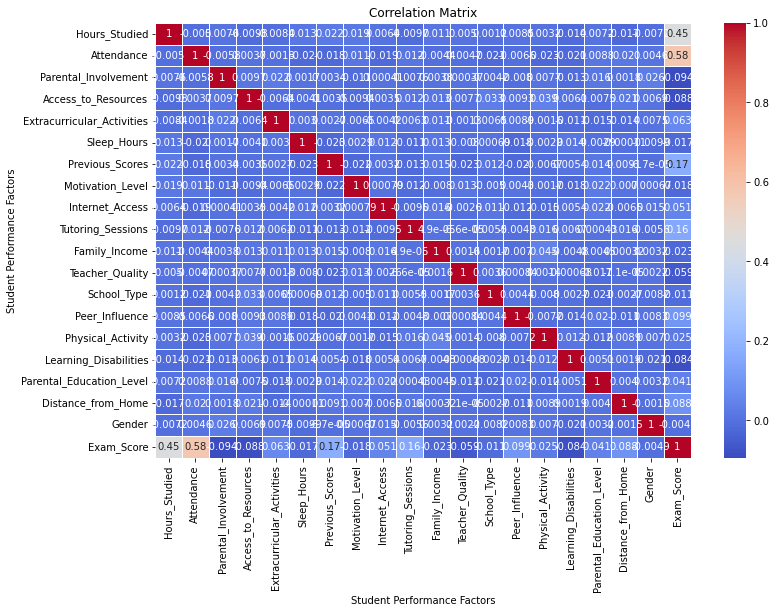

<Figure size 1152x864 with 0 Axes>

In [15]:
correlation_matrix = df_numericize.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix')

plt.xlabel('Student Performance Factors')
plt.ylabel('Student Performance Factors')

plt.figure(figsize=(16, 12))

plt.show()

In [16]:
df_numericize.corr()

Hours_Studied  Attendance  Parental_Involvement  \
Hours_Studied                    1.000000   -0.004997              0.007643   
Attendance                      -0.004997    1.000000             -0.005814   
Parental_Involvement             0.007643   -0.005814              1.000000   
Access_to_Resources             -0.009841    0.003707              0.009719   
Extracurricular_Activities      -0.008377   -0.001754              0.021575   
Sleep_Hours                      0.013119   -0.019602              0.001670   
Previous_Scores                  0.022492   -0.018083              0.003416   
Motivation_Level                 0.019063    0.011425             -0.010840   
Internet_Access                  0.006414   -0.019404              0.000410   
Tutoring_Sessions               -0.009654    0.012070             -0.007615   
Family_Income                    0.011311   -0.004367              0.003808   
Teacher_Quality                  0.004954   -0.004743              0.000366   
School_Type                      0.001167   -0.020981             -0.004217   
Peer_Influence                   0.008521   -0.006632             -0.007987   
Physical_Activity                0.003183   -0.022976              0.007681   
Learning_Disabilities           -0.013920   -0.020877             -0.012548   
Parental_Education_Level         0.007227    0.008763              0.015782   
Distance_from_Home              -0.017255    0.020411              0.001845   
Gender                          -0.007192    0.004621              0.025982   
Exam_Score                       0.445104    0.580259             -0.094038   

                            Access_to_Resources  Extracurricular_Activities  \
Hours_Studied                         -0.009841                   -0.008377   
Attendance                             0.003707                   -0.001754   
Parental_Involvement                   0.009719                    0.021575   
Access_to_Resources                    1.000000                   -0.006369   
Extracurricular_Activities            -0.006369                    1.000000   
Sleep_Hours                           -0.004120                    0.003025   
Previous_Scores                       -0.003504                    0.002666   
Motivation_Level                      -0.009363                   -0.006496   
Internet_Access                        0.003504                   -0.004227   
Tutoring_Sessions                      0.012130                    0.006323   
Family_Income                          0.012572                    0.011429   
Teacher_Quality                        0.007661                   -0.001293   
School_Type                            0.033031                    0.006503   
Peer_Influence                         0.009272                    0.008873   
Physical_Activity                      0.038597                   -0.001597   
Learning_Disabilities                  0.006130                   -0.011197   
Parental_Education_Level              -0.007496                   -0.014846   
Distance_from_Home                     0.021459                   -0.013910   
Gender                                 0.006919                    0.007540   
Exam_Score                            -0.088490                    0.063063   

                            Sleep_Hours  Previous_Scores  Motivation_Level  \
Hours_Studied                  0.013119         0.022492          0.019063   
Attendance                    -0.019602        -0.018083          0.011425   
Parental_Involvement           0.001670         0.003416         -0.010840   
Access_to_Resources           -0.004120        -0.003504         -0.009363   
Extracurricular_Activities     0.003025         0.002666         -0.006496   
Sleep_Hours                    1.000000        -0.023238          0.002928   
Previous_Scores               -0.023238         1.000000         -0.021713   
Motivation_Level               0.002928        -0.021713          1.000000   
Intern

In [17]:
correlation_mat = df_numericize.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

Hours_Studied               Hours_Studied                 1.000000
                            Attendance                   -0.004997
                            Parental_Involvement          0.007643
                            Access_to_Resources          -0.009841
                            Extracurricular_Activities   -0.008377
                            Sleep_Hours                   0.013119
                            Previous_Scores               0.022492
                            Motivation_Level              0.019063
                            Internet_Access               0.006414
                            Tutoring_Sessions            -0.009654
                            Family_Income                 0.011311
                            Teacher_Quality               0.004954
                            School_Type                   0.001167
                            Peer_Influence                0.008521
                            Physical_Activity             0.00

In [18]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

Exam_Score                  Parental_Involvement         -0.094038
Parental_Involvement        Exam_Score                   -0.094038
Access_to_Resources         Exam_Score                   -0.088490
Exam_Score                  Access_to_Resources          -0.088490
Learning_Disabilities       Exam_Score                   -0.083911
Exam_Score                  Learning_Disabilities        -0.083911
                            Teacher_Quality              -0.059247
Teacher_Quality             Exam_Score                   -0.059247
Previous_Scores             Sleep_Hours                  -0.023238
Sleep_Hours                 Previous_Scores              -0.023238
Physical_Activity           Attendance                   -0.022976
Attendance                  Physical_Activity            -0.022976
Teacher_Quality             Previous_Scores              -0.022874
Previous_Scores             Teacher_Quality              -0.022874
Family_Income               Exam_Score                   -0.02

In [19]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

Attendance                  Exam_Score                    0.580259
Exam_Score                  Attendance                    0.580259
Hours_Studied               Hours_Studied                 1.000000
Distance_from_Home          Distance_from_Home            1.000000
Attendance                  Attendance                    1.000000
Parental_Involvement        Parental_Involvement          1.000000
Access_to_Resources         Access_to_Resources           1.000000
Extracurricular_Activities  Extracurricular_Activities    1.000000
Sleep_Hours                 Sleep_Hours                   1.000000
Previous_Scores             Previous_Scores               1.000000
Motivation_Level            Motivation_Level              1.000000
Gender                      Gender                        1.000000
Internet_Access             Internet_Access               1.000000
Family_Income               Family_Income                 1.000000
Teacher_Quality             Teacher_Quality               1.00

In [20]:
# Attendance highest correlation with exam scoring 